In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt

 
"""NeuronUnit module for interaction with the Blue Brain Project data."""

import os
import zipfile
import json

import requests
import matplotlib.pyplot as plt
from neo.io import IgorIO

try:  # Python 3
    from io import BytesIO
    from urllib.request import urlopen, URLError
    MAJOR_VERSION = 3
except ImportError:  # Python 2
    from StringIO import StringIO
    from urllib2 import urlopen, URLError
    MAJOR_VERSION = 2


def is_bbp_up():
    """Check whether the BBP microcircuit portal is up."""
    url = "http://microcircuits.epfl.ch/released_data/B95_folder.zip"
    request = requests.get(url)
    return request.status_code == 200


def list_curated_data():
    """List all curated datasets as of July 1st, 2017.
    Includes those found at
    http://microcircuits.epfl.ch/#/article/article_4_eph
    """
    url = "http://microcircuits.epfl.ch/data/articles/article_4_eph.json"
    cells = []
    try:
        response = urlopen(url)
    except URLError:
        print ("Could not find list of curated data at %s" % URL)
    else:
        data = json.load(response)
        table = data['data_table']['table']['rows']
        for section in table:
            for row in section:
                if 'term' in row:
                    cell = row['term'].split(' ')[1]
                    cells.append(cell)
    return cells


def get_curated_data(data_id, sweeps=None):
    """Download curated data (Igor files) from the microcircuit portal.
    data_id: An ID number like the ones in 'list_curated_data()' that appears
    in http://microcircuits.epfl.ch/#/article/article_4_eph.
    """
    url = "http://microcircuits.epfl.ch/data/released_data/%s.zip" % data_id
    data = get_sweeps(url, sweeps=sweeps)
    return data


def get_uncurated_data(data_id, sweeps=None):
    """Download uncurated data (Igor files) from the microcircuit portal."""
    url = "http://microcircuits.epfl.ch/data/uncurated/%s_folder.zip" % data_id
    data = get_sweeps(url, sweeps=sweeps)
    return data


def get_sweeps(url, sweeps=None):
    """Get sweeps of data from the given URL."""
    print("Getting data from %s" % url)
    path = find_or_download_data(url)  # Base path for this data
    assert type(sweeps) in [type(None), list], "Sweeps must be None or a list."
    sweep_paths = list_sweeps(path)  # Available sweeps
    if sweeps is None:
        sweeps = sweep_paths
    else:
        sweeps = []
        for sweep_path in sweep_paths:
            if any([sweep_path.endswith(sweep for sweep in sweeps)]):
                sweeps.append(sweep_path)
        sweeps = set(sweeps)
    data = {sweep: open_data(sweep) for sweep in sweeps}
    return data


def find_or_download_data(url):
    """Find or download data from the given URL.
    Return a path to a local directory containing the unzipped data found
    at the provided url.  The zipped file will be downloaded and unzipped if
    the directory cannot be found.  The path to the directory is returned.
    """
    zipped = url.split('/')[-1]  # Name of zip file
    unzipped = zipped.split('.')[0]  # Name when unzipped
    z = None
    if not os.path.isdir(unzipped):  # If unzipped version not found
        if MAJOR_VERSION == 2:
            r = requests.get(url, stream=True)
            z = zipfile.ZipFile(StringIO(r.content))
        elif MAJOR_VERSION == 3:
            r = requests.get(url)
            z = zipfile.ZipFile(BytesIO(r.content))
        z.extractall(unzipped)
    return unzipped


def list_sweeps(url, extension='.ibw'):
    """List all sweeps available in the file at the given URL."""
    path = find_or_download_data(url)  # Base path for this data
    sweeps = find_sweeps(path, extension=extension)
    return sweeps


def find_sweeps(path, extension='.ibw', depth=0):
    """Find sweeps available at the given path.
    Starting from 'path', recursively searches subdirectories and returns
    full paths to all files ending with 'extension'.
    """
    sweeps = []
    items = os.listdir(path)
    for item in items:
        new_path = os.path.join(path, item)
        if os.path.isdir(new_path):
            sweeps += find_sweeps(new_path, extension=extension, depth=depth+1)
        if os.path.isfile(new_path) and item.endswith(extension):
            sweeps += [new_path]
    return sweeps


def open_data(path):
    """Take a 'path' to an .ibw file and returns a neo.core.AnalogSignal."""
    igor_io = IgorIO(filename=path)
    analog_signal = igor_io.read_analogsignal()
    return analog_signal


def plot_data(signal):
    """Plot the data in a neo.core.AnalogSignal."""
    plt.plot(signal.times, signal)
    plt.xlabel(signal.sampling_period.dimensionality)
    plt.ylabel(signal.dimensionality)

Getting data from http://microcircuits.epfl.ch/data/released_data/B95.zip


<IPython.core.display.Javascript object>


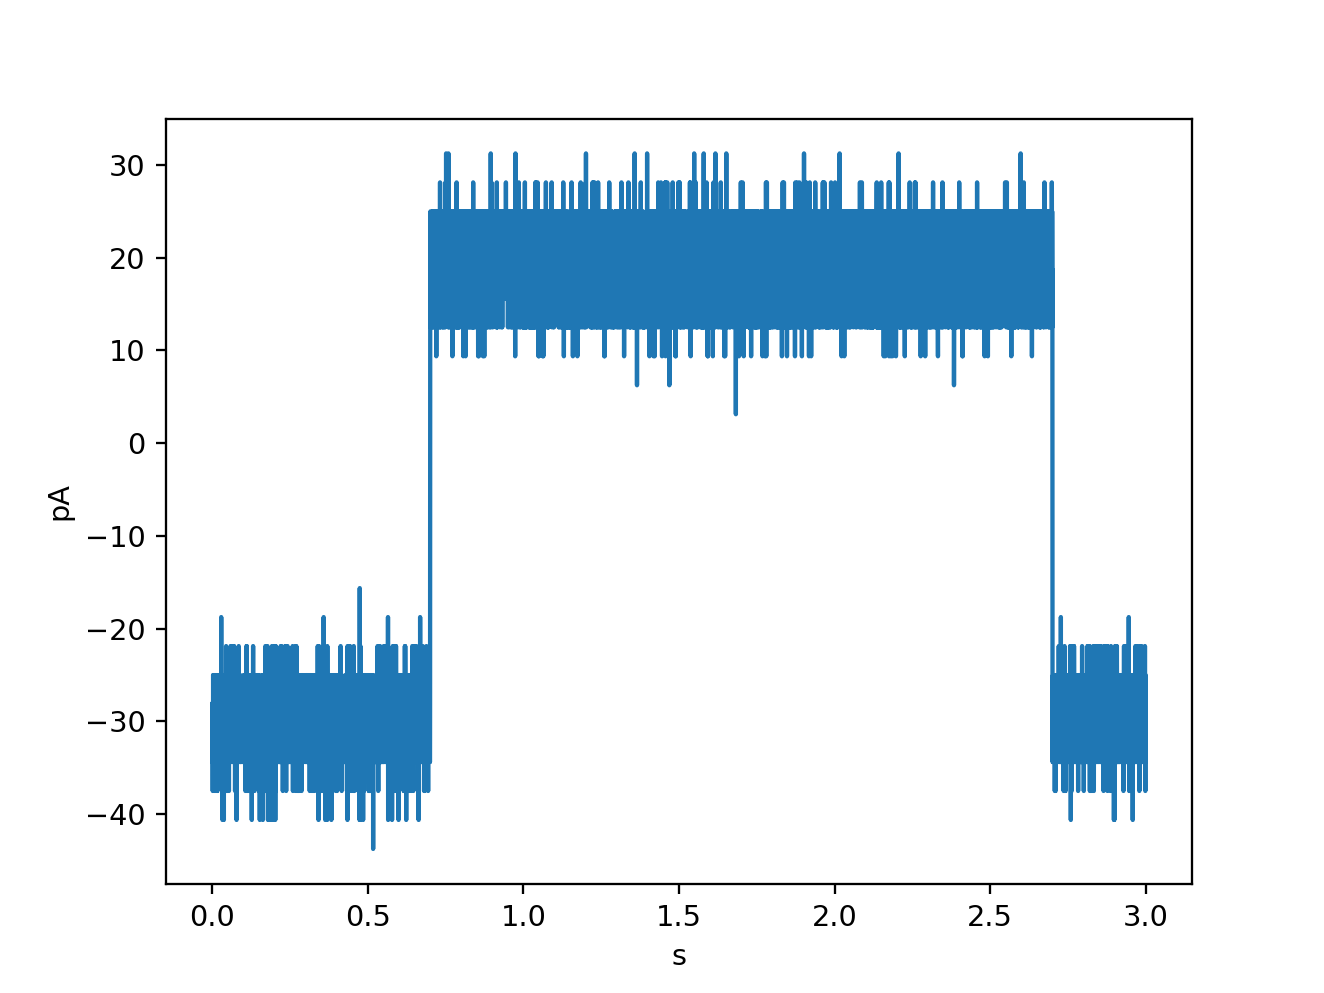

In [2]:
#from neuronunit import bbp
data_id = list_curated_data()[0]
data = get_curated_data(data_id)
fifth_sweep = list_sweeps(data_id)[4]
plot_data(data[fifth_sweep])

In [5]:
print(list_curated_data())


['B95', 'C9', 'C12', 'A53', 'A61', 'A13', 'B9', 'A86', 'E30', 'B43', 'B28', 'B86', 'B15', 'B82', 'B76', 'B77', 'E47', 'B21', 'A80', 'B27', 'A69', 'A82', 'B8', 'A91', 'A90', 'A89', 'B88', 'B47', 'C14', 'A16', 'B20', 'B72', 'E65', 'E56', 'A51', 'A85', 'C96', 'B18', 'B96', 'B23', 'A66', 'B39', 'E76', 'B1', 'B92', 'A15', 'D22', 'B22', 'B50', 'D60', 'D24', 'E25', 'B94', 'A84', 'B93', 'B19', 'D80', 'A22', 'A19', 'A77', 'C26', 'C47', 'E45', 'B4', 'E1', 'B48', 'A100', 'A88', 'A87', 'B78', 'D99', 'B90', 'B24', 'A96', 'E79', 'B26', 'E12', 'B85', 'B3', 'B34', 'C54', 'A83', 'A70', 'A68', 'D100', 'C88', 'C29', 'B6', 'C55', 'D14', 'C25', 'B58', 'B2', 'C23', 'B89', 'A65', 'A67', 'E54', 'A95', 'C19', 'C31', 'B16', 'A48', 'B17', 'B42', 'A27', 'B98', 'D61', 'D34', 'B80', 'A81', 'B31', 'A32', 'C73', 'C9', 'B70', 'B25', 'B52', 'C49', 'A93', 'B97', 'E24', 'A79', 'D12', 'B87', 'D3', 'B49', 'A94', 'B81']


In [3]:
!pip install igor

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
